In [1]:
# install camb
# install getdist
# install cobaya
# install bilby

In [2]:
# initial imports:
import sys, os
os.environ['TF_USE_LEGACY_KERAS'] = '1'  # needed for tensorflow KERAS compatibility
os.environ['DISPLAY'] = 'inline'  # hack to get getdist working
import matplotlib.pyplot as plt
import numpy as np

# tensiometer local imports:
here = os.path.dirname(os.getcwd())
tensiometer_path = os.path.join(here, 'tensiometer')
sys.path.append(tensiometer_path)

import tensiometer
print('Tensiometer version:', tensiometer.__version__)
print('Tensiometer path:', tensiometer.__path__)

Tensiometer version: 1.0.2
Tensiometer path: ['/auto_farm/farm_fs/mraveri/projects/marialuisa/advanced_stats/ParametricModels/tensiometer/tensiometer']


In [3]:
# chains paths:

chains_dir = os.path.join('chains')

In [4]:
# getdist settings:

getdist_settings = {
    'smooth_scale_1D': 0.3,
    'boundary_correction_order': 1,
    'mult_bias_correction_order': 1,
    'smooth_scale_2D': 0.3,
    }

In [5]:
# import chain
from cobaya import load_samples

planck = '01p2_w0wa_CMB_PlanckTTTEEE'
act = '01p3_w0wa_CMB_ACTTTTEEE'
cmb_all = '02p2_w0wa_CMB_all'
cmb_bao_sn = '04p1_w0wa_CMB_BAO_SN'

chain_planck = load_samples(os.path.join(chains_dir, planck), skip=0.3, to_getdist=True)
chain_act = load_samples(os.path.join(chains_dir, act), skip=0.3, to_getdist=True)
chain_cmb_all = load_samples(os.path.join(chains_dir, cmb_all), skip=0.3, to_getdist=True)
chain_cmb_bao_sn = load_samples(os.path.join(chains_dir, cmb_bao_sn), skip=0.3, to_getdist=True)

chain_planck.label = 'Planck TTTEEE'
chain_act.label = 'ACT TTTEEE'
chain_cmb_all.label = 'Planck TTTEEE + ACT TTTEEE + lowl'
chain_cmb_bao_sn.label = 'CMB + BAO + SN'

chain_planck.updateSettings(getdist_settings)
chain_act.updateSettings(getdist_settings)
chain_cmb_all.updateSettings(getdist_settings)
chain_cmb_bao_sn.updateSettings(getdist_settings)

chain_planck.updateBaseStatistics()
chain_act.updateBaseStatistics()
chain_cmb_all.updateBaseStatistics()
chain_cmb_bao_sn.updateBaseStatistics()

chain_planck.getConvergeTests()
chain_act.getConvergeTests()
chain_cmb_all.getConvergeTests()
chain_cmb_bao_sn.getConvergeTests()

print(chain_planck.label+': R =', round(chain_planck.GelmanRubin, 4))
print(chain_act.label+': R =', round(chain_act.GelmanRubin, 4))
print(chain_cmb_all.label+': R =', round(chain_cmb_all.GelmanRubin, 4))
print(chain_cmb_bao_sn.label+': R =', round(chain_cmb_bao_sn.GelmanRubin, 4))

Planck TTTEEE: R = 0.013
ACT TTTEEE: R = 0.0316
Planck TTTEEE + ACT TTTEEE + lowl: R = 0.0143
CMB + BAO + SN: R = 0.0088


In [6]:
# rebuild the model:
from cobaya.model import get_model
import yaml

names = [planck, act, cmb_all, cmb_bao_sn]

# define the path to the YAML parameters file:
for name in names:
    yaml_params = os.path.join(chains_dir, name + '.input.yaml')
    # load the parameters from the YAML file:
    with open(yaml_params, 'r') as f:
        params_dict = yaml.safe_load(f)
    # remove the 'path' key from the 'camb' dictionary if it exists:
    if 'path' in params_dict.get('theory', {}).get('camb', {}):
        del params_dict['theory']['camb']['path']
    if 'recombination_model' in params_dict.get('theory', {}).get('camb', {}).get('extra_args', {}):
        del params_dict['theory']['camb']['extra_args']['recombination_model']

    # build the model:
    model = get_model(params_dict)

[model] *WARNING* Ignored blocks/options: ['sampler', 'output']
[camb] `camb` module loaded successfully from /auto_farm/farm_fs/mraveri/software/anaconda3/envs/mlg/lib/python3.9/site-packages/camb
[model] *WARNING* Ignored blocks/options: ['sampler', 'output']
[camb] `camb` module loaded successfully from /auto_farm/farm_fs/mraveri/software/anaconda3/envs/mlg/lib/python3.9/site-packages/camb
[model] *WARNING* Ignored blocks/options: ['sampler', 'output']


/home/mraveri/software/anaconda3/envs/mlg/lib/python3.9/site-packages/sacc/sacc.py:935: UserWarning: The FITS format without the 'sacc_ordering' column is deprecated. Assuming data rows are in the correct order as it was before version 1.0.
  warnings.warn(


[camb] `camb` module loaded successfully from /auto_farm/farm_fs/mraveri/software/anaconda3/envs/mlg/lib/python3.9/site-packages/camb


/home/mraveri/software/anaconda3/envs/mlg/lib/python3.9/site-packages/sacc/sacc.py:935: UserWarning: The FITS format without the 'sacc_ordering' column is deprecated. Assuming data rows are in the correct order as it was before version 1.0.
  warnings.warn(


[planck_2020_lollipop.lowleb] Initialized!
[model] *WARNING* Ignored blocks/options: ['sampler', 'output']
[camb] `camb` module loaded successfully from /auto_farm/farm_fs/mraveri/software/anaconda3/envs/mlg/lib/python3.9/site-packages/camb


/home/mraveri/software/anaconda3/envs/mlg/lib/python3.9/site-packages/sacc/sacc.py:935: UserWarning: The FITS format without the 'sacc_ordering' column is deprecated. Assuming data rows are in the correct order as it was before version 1.0.
  warnings.warn(


[planck_2020_lollipop.lowleb] Initialized!
[bao.desi_dr2.desi_bao_all] Initialized.


In [7]:
chain_planck.getParamNames().list()
chain_act.getParamNames().list()
chain_cmb_all.getParamNames().list()
chain_cmb_bao_sn.getParamNames().list()

['w',
 'wa',
 'H0',
 'logA',
 'ns',
 'ombh2',
 'omch2',
 'tau',
 'A_planck',
 'P_act',
 'A',
 'As',
 'DHBBN',
 'YHe',
 'Y_p',
 'age',
 'clamp',
 'omega_de',
 'omegam',
 'omegamh2',
 'rdrag',
 's8h5',
 'S8',
 'S8_optimal',
 's8omegamp25',
 'sigma8',
 'thetastar',
 'zrei',
 'A_act',
 'chi2__BAO',
 'chi2__CMB',
 'chi2__SN',
 'minuslogprior',
 'minuslogprior__0',
 'chi2',
 'chi2__act_dr6_cmbonly.PlanckActCut',
 'chi2__act_dr6_cmbonly.ACTDR6CMBonly',
 'chi2__planck_2018_lowl.TT',
 'chi2__planck_2020_lollipop.lowlEB',
 'chi2__bao.desi_dr2.desi_bao_all',
 'chi2__sn.desy5']

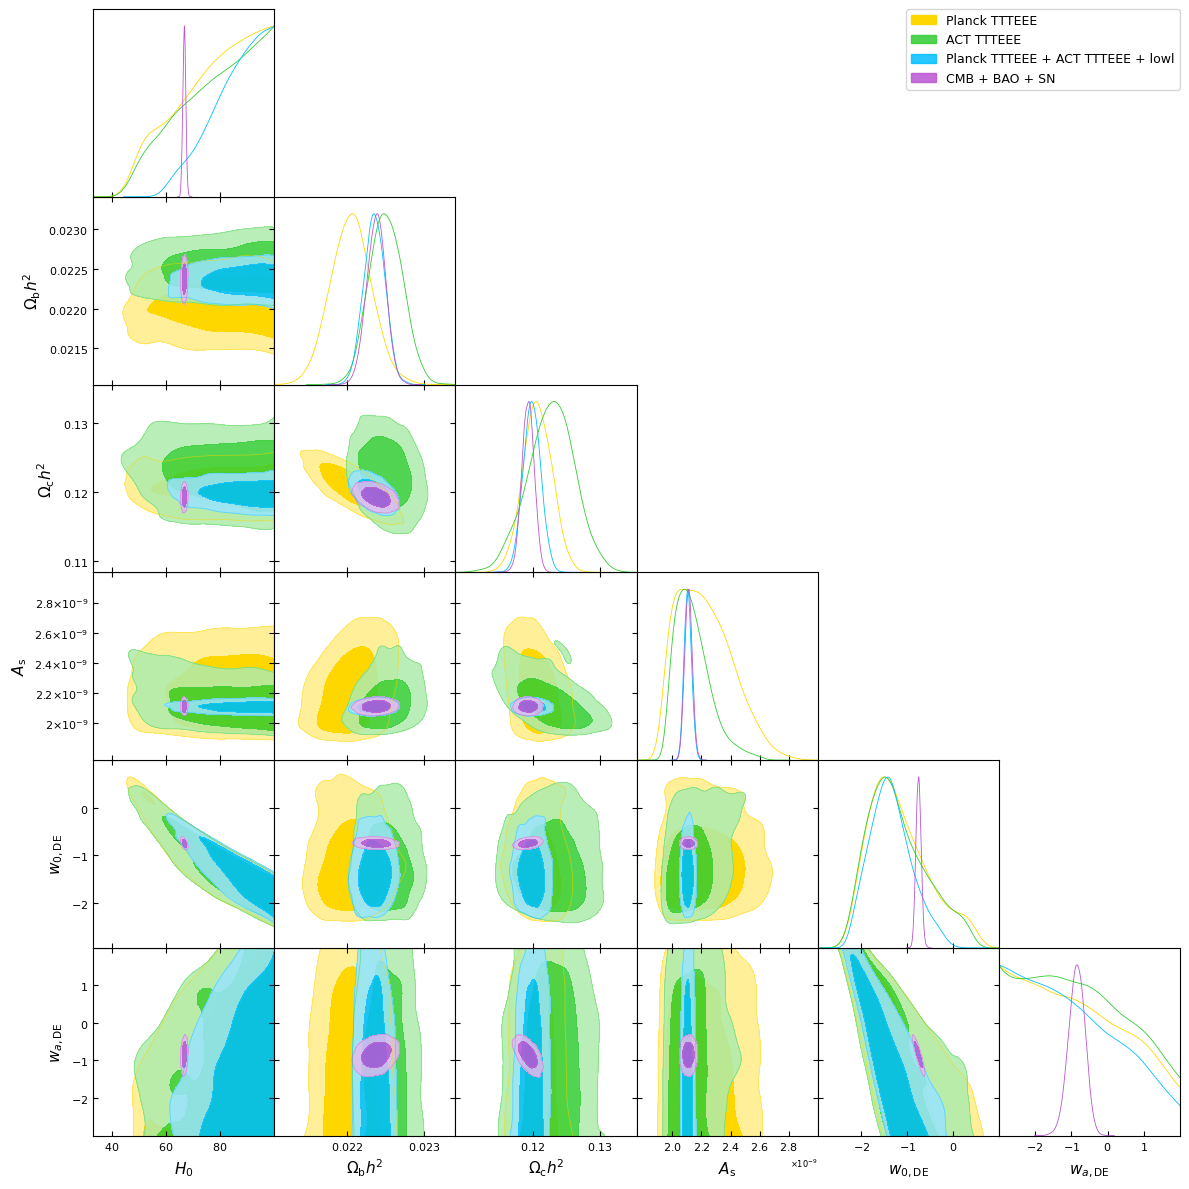

In [8]:
# triangle plot with the six cosmological parameters:
from getdist import plots

params = ['H0', 'ombh2', 'omch2', 'As', 'w', 'wa']
g = plots.getSubplotPlotter()
g.triangle_plot([chain_planck, chain_act, chain_cmb_all, chain_cmb_bao_sn],
                params=params,
                filled=True, legend=True, legend_loc='upper right',
                colors=['gold', 'limegreen', 'deepskyblue', 'mediumorchid'],
                contour_colors=['gold', 'limegreen', 'deepskyblue', 'mediumorchid'],
)

**Covariance**

In [9]:
cov = np.loadtxt("chains/01p2_w0wa_CMB_PlanckTTTEEE.covmat")

print(cov)

# dimension
dim = len(cov)
print(dim)

[[ 4.26293115e-01 -5.69146830e-01 -8.07770713e+00  2.60220963e-03
   2.91538455e-04  7.77891566e-06 -5.59044669e-05  1.34553455e-03
  -4.61629658e-06]
 [-5.69146830e-01  1.84733387e+00  4.36047748e+00  2.74717274e-03
  -7.89058763e-05 -1.30333215e-05  4.83077283e-05  1.35469040e-03
   4.24413647e-05]
 [-8.07770713e+00  4.36047748e+00  1.98032963e+02 -4.11790637e-02
   3.86073579e-03  2.41498106e-04 -1.99040456e-03 -1.85074287e-02
  -1.20539129e-04]
 [ 2.60220963e-03  2.74717274e-03 -4.11790637e-02  7.14653690e-03
   3.05865337e-04  7.66933560e-06 -5.88334117e-05  3.62858371e-03
   8.91791022e-06]
 [ 2.91538455e-04 -7.89058763e-05  3.86073579e-03  3.05865337e-04
   7.30393283e-05  1.79840551e-06 -1.62169377e-05  1.69367362e-04
   2.93879069e-07]
 [ 7.77891566e-06 -1.30333215e-05  2.41498106e-04  7.66933560e-06
   1.79840551e-06  7.39151249e-08 -4.79444686e-07  4.25181055e-06
   1.19303504e-08]
 [-5.59044669e-05  4.83077283e-05 -1.99040456e-03 -5.88334117e-05
  -1.62169377e-05 -4.7944468